### Data overview

In [16]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os

In [17]:
os.chdir('C:\\Users\\corne\\OneDrive\\Documents\\DS_Portfolio\\crossfit_project\\crossfit_project')
df = pd.read_csv('CrossFit_Games_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423006 entries, 0 to 423005
Data columns (total 27 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   athlete_id  423003 non-null  float64
 1   name        331110 non-null  object 
 2   region      251262 non-null  object 
 3   team        155160 non-null  object 
 4   affiliate   241916 non-null  object 
 5   gender      331110 non-null  object 
 6   age         331110 non-null  float64
 7   height      159869 non-null  float64
 8   weight      229890 non-null  float64
 9   fran        55426 non-null   float64
 10  helen       30279 non-null   float64
 11  grace       40745 non-null   float64
 12  filthy50    19359 non-null   float64
 13  fgonebad    29738 non-null   float64
 14  run400      22246 non-null   float64
 15  run5k       36097 non-null   float64
 16  candj       104435 non-null  float64
 17  snatch      97280 non-null   float64
 18  deadlift    115323 non-null  float64
 19  ba

In [18]:
df.head()

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,snatch,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong
0,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,NaN,400.0,305.0,NaN,NaN,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|
1,3517.0,Derek Abdella,NaN,NaN,NaN,Male,42.0,70.0,190.0,NaN,...,NaN,NaN,NaN,NaN,NaN,I have a coach who determines my programming|I...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|
2,4691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5164.0,Abo Brandon,Southern California,LAX CrossFit,LAX CrossFit,Male,40.0,67.0,NaN,211.0,...,200.0,375.0,325.0,25.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|
4,5286.0,Bryce Abbey,NaN,NaN,NaN,Male,32.0,65.0,149.0,206.0,...,150.0,NaN,325.0,50.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,1-2 years|


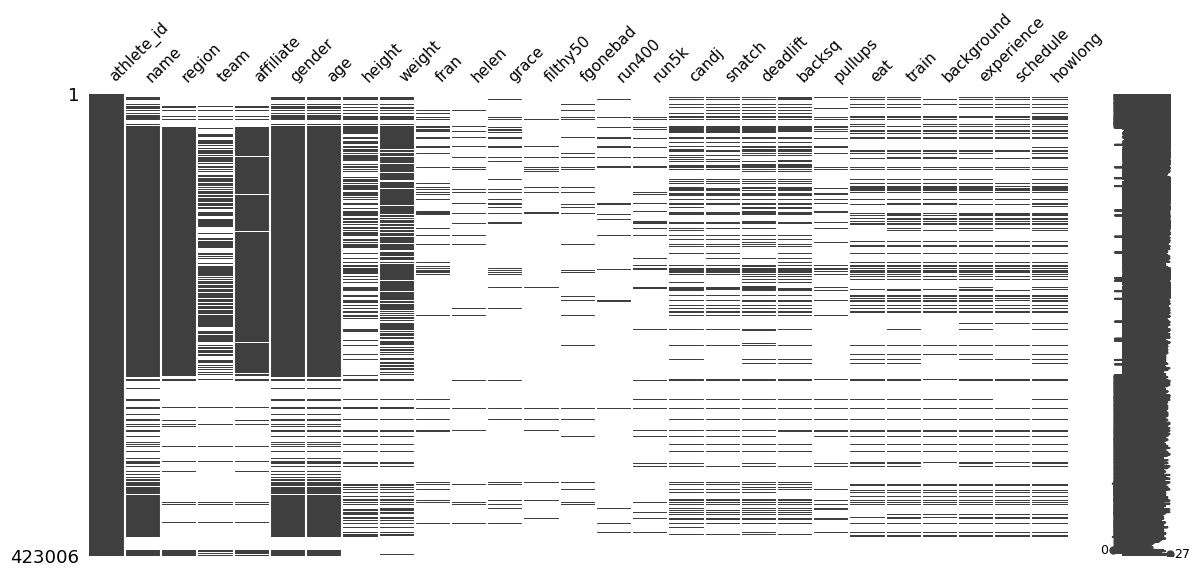

In [19]:
msno.matrix(df, figsize=(14,6),fontsize=11);

## Data cleaning

### Event selection
Data that is not relevant to our analysis was removed from consideration along with the less frequently performed fitness events. It was necessary to remove these less common events to maintain a large dataset.

In [20]:
df = df.dropna(subset=['region','age','weight','height','howlong','gender','eat','train','background','experience','schedule','howlong','deadlift','candj','snatch','backsq','experience','background','schedule','howlong']) #removing NaNs from parameters of interest 
df = df.drop(columns=['affiliate','team','name','athlete_id','fran','helen','grace','filthy50','fgonebad','run400','run5k','pullups','train']) #removing paramters not of interest + less popular events

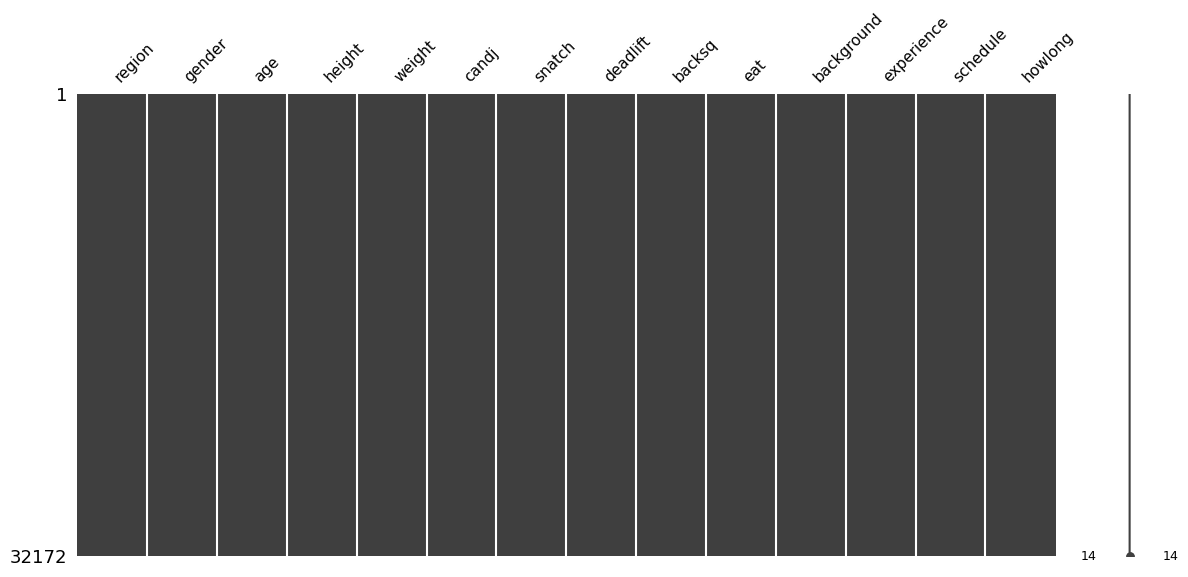

In [21]:
msno.matrix(df, figsize=(14,6),fontsize=11);

### Outlier Removal

Only clear outliers were removed from the dataset. These outliers are suspected to be the result of data entry errors and were diagnosed from highly inprobable heights and weights and performances in events exceeding current world records. Only adults and male and female competitors were considered in this analysis.

In [22]:
#removing problematic entries 
df = df[df['weight'] < 1500] #removes two anomolous weight entries of 1,750 and 2,113
df = df[df['gender']!='--'] #removes 9 non-male/female gender entries due to small sample size
df = df[df['age']>=18] #only considering adults 
df = df[(df['height']<96)&(df['height']>48)]#selects people between 4 and 8 feet

#no lifts above world recording holding lifts were included
df = df[(df['deadlift']>0)&(df['deadlift']<=1105)|((df['gender']=='Female')&(df['deadlift']<=636))] #removes negative deadlift weights and deadlifts above the current world record
df = df[(df['candj']>0)&(df['candj']<=395)]#|((df['gender']=='Female')&(df['candj']<=265))] #removes negative clean and jerk value and reported weights above the current world record
df = df[(df['snatch']>0)&(df['snatch']<=496)]#|((df['gender']=='Female')&(df['snatch']<=341))] #removes weights above the current world record 
df = df[(df['backsq']>0)&(df['backsq']<=1069)]#|((df['gender']=='Female')&(df['backsq']<=615))] #removes weights over current world record

### Cleaning survey data

Survey responses were cleaned and encoded. Problematically, multiple survey questions were collated into single responses on eating, background, training, and CrossFit experience. This means, for example, that if someone had worked as a CrossFit trainer, completed a CrossFit course, started doing CrossFit alone and declined to answer if they found CrossFit life changing, that all responses would be combined into one answer on experience. Similarly, it is possible for a single response to contain contradictory information. For instance, a respondent could indicate that they have no previous athletic background and were also a college athlete.

Thus, cleaning this data set, separating answers into individual question responses and removing non-sensical responses is non-trivial. Non-sensical survey responses were removed from consideration, and responses were organized to the best extent possible. 

In [23]:
#get rid of declines to answer as only response 
decline_dict = {'Decline to answer|':np.nan}
df = df.replace(decline_dict)
df = df.dropna(subset=['background','experience','schedule','howlong','eat'])

In [24]:
#encoding background data 

#encoding background questions 
df['rec'] = np.where(df['background'].str.contains('I regularly play recreational sports'), 1, 0)
df['high_school'] = np.where(df['background'].str.contains('I played youth or high school level sports'), 1, 0)
df['college'] = np.where(df['background'].str.contains('I played college sports'), 1, 0)
df['pro'] = np.where(df['background'].str.contains('I played professional sports'), 1, 0)
df['no_background'] = np.where(df['background'].str.contains('I have no athletic background besides CrossFit'), 1, 0)

#delete nonsense answers
df = df[~(((df['high_school']==1)|(df['college']==1)|(df['pro']==1)|(df['rec']==1))&(df['no_background']==1))] #you can't have no background and also a background 

In [25]:
#encoding experience questions

#create encoded columns for experience reponse
df['exp_coach'] = np.where(df['experience'].str.contains('I began CrossFit with a coach'),1,0)
df['exp_alone'] = np.where(df['experience'].str.contains('I began CrossFit by trying it alone'),1,0)
df['exp_courses'] = np.where(df['experience'].str.contains('I have attended one or more specialty courses'),1,0)
df['life_changing'] = np.where(df['experience'].str.contains('I have had a life changing experience due to CrossFit'),1,0)
df['exp_trainer'] = np.where(df['experience'].str.contains('I train other people'),1,0)
df['exp_level1'] = np.where(df['experience'].str.contains('I have completed the CrossFit Level 1 certificate course'),1,0)

#delete nonsense answers
df = df[~((df['exp_coach']==1)&(df['exp_alone']==1))] #you can't start alone and with a coach

#creating no response option for coaching start
df['exp_start_nr'] = np.where(((df['exp_coach']==0)&(df['exp_alone']==0)),1,0)

#other options are assumed to be 0 if not explicitly selected

In [26]:
#creating encoded columns with schedule data
df['rest_plus'] = np.where(df['schedule'].str.contains('I typically rest 4 or more days per month'),1,0)
df['rest_minus'] = np.where(df['schedule'].str.contains('I typically rest fewer than 4 days per month'),1,0)
df['rest_sched'] = np.where(df['schedule'].str.contains('I strictly schedule my rest days'),1,0)

df['sched_0extra'] = np.where(df['schedule'].str.contains('I usually only do 1 workout a day'),1,0)
df['sched_1extra'] = np.where(df['schedule'].str.contains('I do multiple workouts in a day 1x a week'),1,0)
df['sched_2extra'] = np.where(df['schedule'].str.contains('I do multiple workouts in a day 2x a week'),1,0)
df['sched_3extra'] = np.where(df['schedule'].str.contains('I do multiple workouts in a day 3\+ times a week'),1,0)

#removing/correcting problematic responses 
df = df[~((df['rest_plus']==1)&(df['rest_minus']==1))] #you can't have both more than and less than 4 rest days/month 

#points are only assigned for the highest extra workout value (3x only vs. 3x and 2x and 1x if multi selected)
df['sched_0extra'] = np.where((df['sched_3extra']==1),0,df['sched_0extra'])
df['sched_1extra'] = np.where((df['sched_3extra']==1),0,df['sched_1extra'])
df['sched_2extra'] = np.where((df['sched_3extra']==1),0,df['sched_2extra'])
df['sched_0extra'] = np.where((df['sched_2extra']==1),0,df['sched_0extra'])
df['sched_1extra'] = np.where((df['sched_2extra']==1),0,df['sched_1extra'])
df['sched_0extra'] = np.where((df['sched_1extra']==1),0,df['sched_0extra'])

#adding no response columns
df['sched_nr'] = np.where(((df['sched_0extra']==0)&(df['sched_1extra']==0)&(df['sched_2extra']==0)&(df['sched_3extra']==0)),1,0)
df['rest_nr'] = np.where(((df['rest_plus']==0)&(df['rest_minus']==0)),1,0)
#schedling rest days is assumed to be 0 if not explicitly selected

In [27]:
# encoding howlong (crossfit lifetime)
df['exp_1to2yrs'] = np.where((df['howlong'].str.contains('1-2 years')),1,0)
df['exp_2to4yrs'] = np.where((df['howlong'].str.contains('2-4 years')),1,0)
df['exp_4plus'] = np.where((df['howlong'].str.contains('4\+ years')),1,0)
df['exp_6to12mo'] = np.where((df['howlong'].str.contains('6-12 months')),1,0)
df['exp_lt6mo'] = np.where((df['howlong'].str.contains('Less than 6 months')),1,0)

#keeping only higest repsonse 
df['exp_lt6mo'] = np.where((df['exp_4plus']==1),0,df['exp_lt6mo'])
df['exp_6to12mo'] = np.where((df['exp_4plus']==1),0,df['exp_6to12mo'])
df['exp_1to2yrs'] = np.where((df['exp_4plus']==1),0,df['exp_1to2yrs'])
df['exp_2to4yrs'] = np.where((df['exp_4plus']==1),0,df['exp_2to4yrs'])
df['exp_lt6mo'] = np.where((df['exp_2to4yrs']==1),0,df['exp_lt6mo'])
df['exp_6to12mo'] = np.where((df['exp_2to4yrs']==1),0,df['exp_6to12mo'])
df['exp_1to2yrs'] = np.where((df['exp_2to4yrs']==1),0,df['exp_1to2yrs'])
df['exp_lt6mo'] = np.where((df['exp_1to2yrs']==1),0,df['exp_lt6mo'])
df['exp_6to12mo'] = np.where((df['exp_1to2yrs']==1),0,df['exp_6to12mo'])
df['exp_lt6mo'] = np.where((df['exp_6to12mo']==1),0,df['exp_lt6mo'])

In [28]:
#encoding dietary preferences 
df['eat_conv'] = np.where((df['eat'].str.contains('I eat whatever is convenient')),1,0)
df['eat_cheat']= np.where((df['eat'].str.contains('I eat 1-3 full cheat meals per week')),1,0)
df['eat_quality']= np.where((df['eat'].str.contains('I eat quality foods but don\'t measure the amount')),1,0)
df['eat_paleo']= np.where((df['eat'].str.contains('I eat strict Paleo')),1,0)
df['eat_cheat']= np.where((df['eat'].str.contains('I eat 1-3 full cheat meals per week')),1,0)
df['eat_weigh'] = np.where((df['eat'].str.contains('I weigh and measure my food')),1,0)

In [29]:
#encoding location as US vs non-US
US_regions = ['Southern California', 'North East', 'North Central','South East', 'South Central', 'South West', 'Mid Atlantic','Northern California','Central East', 'North West']
df['US'] = np.where((df['region'].isin(US_regions)),1,0)

In [30]:
#encoding gender
df['gender_'] = np.where(df['gender']=='Male',1,0)

## Feature Engineering

### Normalizing lifts

It is customary in powerlifting to normalize the weight lifted to the bodyweight of the athlete. This corrects for the physical advantage of leverage and isolates the athletic contribution to a lift.

In [31]:
df['norm_dl'] = df['deadlift']/df['weight']
df['norm_j'] = df['candj']/df['weight']
df['norm_s'] = df['snatch']/df['weight']
df['norm_bs'] = df['backsq']/df['weight']

df['total_lift'] = df['norm_dl']+df['norm_j']+df['norm_s']+df['norm_bs']

### Calculating body mass index (BMI)
BMI is a measure of body composition based on weight and height. It categorizes individuals as underweight, normal weight, overweight, or obese, and can be used as a starting point to set fitness goals. However, BMI does not distinguish between muscle and fat and can mistake highly muscular individuals as overweight.

In [33]:
df['BMI'] = df['weight']*0.453592/np.square(df['height']*0.0254)

df = df[(df['BMI']>=17)&(df['BMI']<=50)]#considers only underweight - morbidly obese competitors

## Event performance

Before exploring responses, we examine the normalized performance for the male and female athletes surveyed. The distributions are approximately normal in all cases, but the snatch and clean and jerk events have a wider distribution. This is likely the result of the importance of technique in these events, which leads to wider variation in addition to natural differences in strength.

In [36]:
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

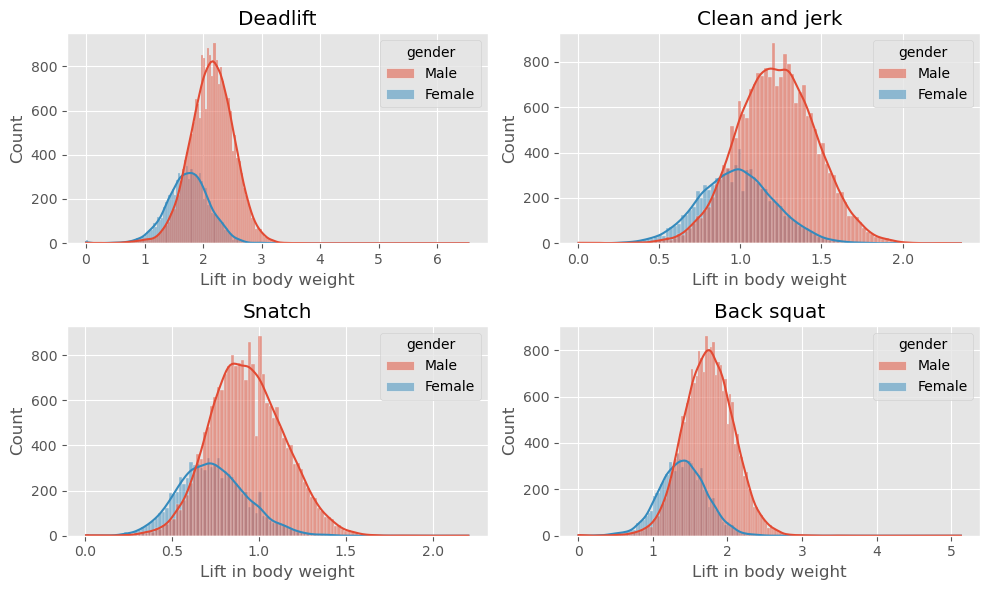

In [37]:
xlabel = 'Lift in body weight'
plt.subplot(221)
sns.histplot(data = df, x = 'norm_dl', hue='gender',kde = True);
plt.title('Deadlift')
plt.xlabel(xlabel)
plt.subplot(222)
sns.histplot(data = df, x = 'norm_j', hue='gender',kde = True);
plt.title('Clean and jerk')
plt.xlabel(xlabel)
plt.tight_layout()
plt.subplot(223)
sns.histplot(data = df, x = 'norm_s', hue='gender',kde = True);
plt.title('Snatch')
plt.xlabel(xlabel)
plt.subplot(224)
sns.histplot(data = df, x = 'norm_bs', hue='gender',kde = True);
plt.title('Back squat')
plt.xlabel(xlabel)
plt.tight_layout()

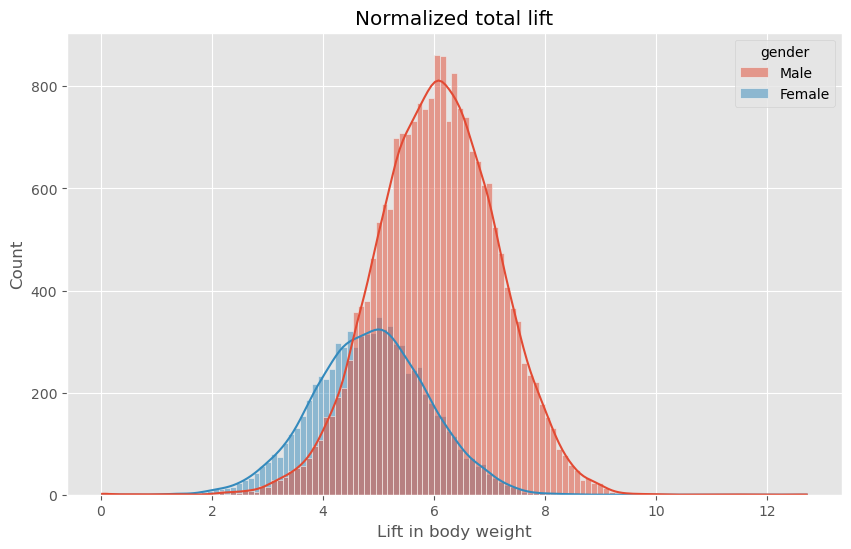

In [38]:
#total lift 
sns.histplot(data = df, x = 'total_lift', hue='gender',kde = True);
plt.title('Normalized total lift')
plt.xlabel(xlabel);

## Athlete demographics and performance

Athlete demographics were collected as part of provided survey:
- Gender 
- Age
- BMI (via height and weight)
- Region

We explore the data and look for correlations with performance.

### Gender

Male competitors outnumber female competitors by 2.6 to 1. This is unsurprising as CrossFit is a strength-based sport, which typically attracts men. 

<Axes: xlabel='gender', ylabel='Count'>

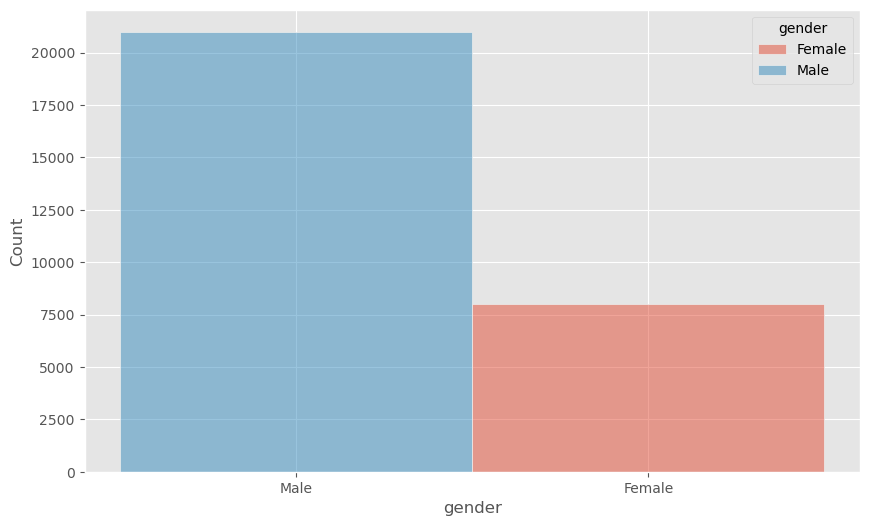

In [46]:
sns.histplot(data = df, x = 'gender', hue = 'gender', hue_order = ['Female','Male'])
#df.groupby('gender').agg('count') #20996/7999

We see expected gender differences in performance between the male and female groups. Male athletes outlifted female athletes on a body weight normalized basis by 24.5%. 

Text(0, 0.5, 'Total lift (bodyweight)')

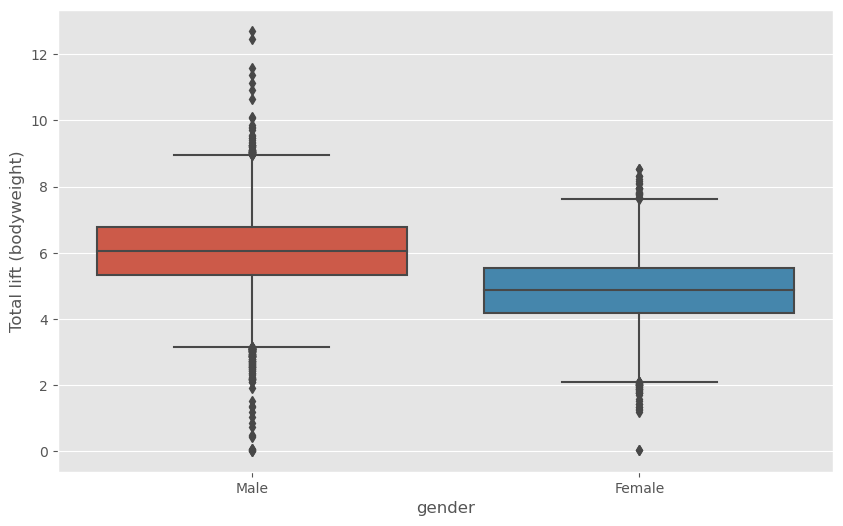

In [53]:
sns.boxplot(x=df.gender, y=df.total_lift)
plt.ylabel('Total lift (bodyweight)')

#df[['total_lift','gender']].groupby('gender').agg('mean') #(6.05-4.86)/4.86

### Region

Most competitors are based in the US, and CrossFit appears to be particularly popular in California. Outside the US, the most popular locations for CrossFit are Canada and Europe.

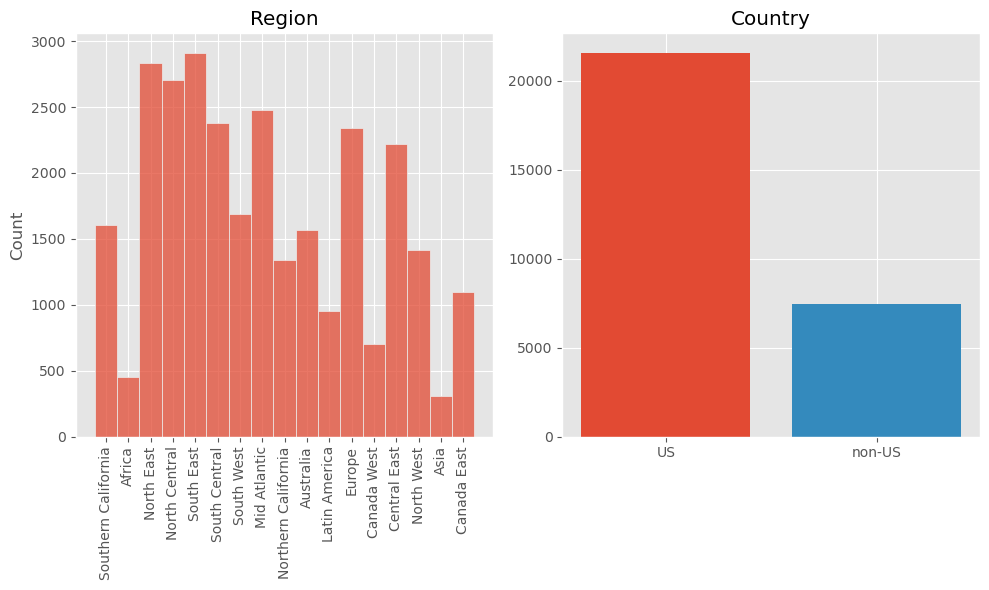

In [39]:
plt.subplot(1,2,1)
plt.title('Region')
sns.histplot(data = df, x = 'region')
plt.xlabel('')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
plt.title('Country')
plt.bar('US',df['US'].sum())
plt.bar('non-US',(df.shape[0]-df['US'].sum()))

plt.tight_layout()
plt.show()

CrossFit athletes in the US appear to slightly outperform CrossFit athletes outside of the US. This could be due to increased local competition driving athletes to higher levels of performance or access to sophisticated training facilities and experienced coaches. 

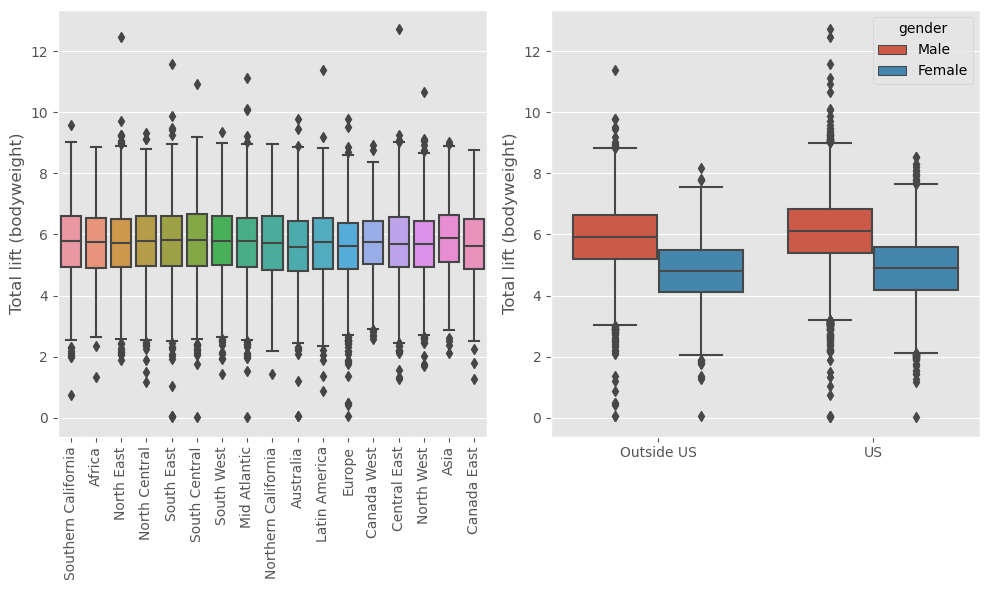

In [40]:
plt.subplot(1,2,1)
sns.boxplot(x=df.region,y=df.total_lift)
plt.xticks(rotation = 90)
plt.xlabel('')
plt.ylabel('Total lift (bodyweight)')
ax = plt.subplot(1,2,2)
sns.boxplot(x=df.US, y=df.total_lift, hue = df.gender)
plt.tight_layout()
plt.ylabel('Total lift (bodyweight)')
ax.set_xticklabels(('Outside US','US'))
plt.xlabel('')
plt.show()